In [1]:
interface_training = []
solution_training = []
target_training = []

In [2]:
import torch
import csv

def csv_to_list(csv_reader_object, list_object):
    for row in csv_reader_object:
        full_row = []
        for i in range(4):
            col = row[i].replace('(', '')
            col = col.replace(')', '')
            col = col.replace(',', ' ')
            col = col.split()
            full_row += [float(col[j]) for j in range(2)]
        list_object += [full_row]
        
if torch.is_tensor(interface_training):
    interface_training = interface_training.tolist()
    
if torch.is_tensor(solution_training):
    solution_training = solution_training.tolist()
    
if torch.is_tensor(target_training):
    target_training = target_training.tolist()


with open('training_data/interface_0_1_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_training)
        
        
with open('training_data/solution_0_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution_training)
                
        
with open('training_data/interface_1_0_4_training.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, target_training)
        
        
interface_training = torch.Tensor(interface_training)
#print(interface)

solution_training = torch.Tensor(solution_training)
#print(solution)

inp_training = torch.cat((interface_training, solution_training), 1)
#inp = solution
print(inp_training.size())

target_training = torch.Tensor(target_training)
#target += interface
print(target_training.size())
#print(inp)

torch.Size([592, 16])
torch.Size([592, 8])


In [3]:
interface_test = []
solution_test = []
target_test = []

with open('training_data/interface_0_1_1_test.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_test)
        
        
with open('training_data/solution_0_1_test.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution_test)
                
        
with open('training_data/interface_1_0_4_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, target_test)
    
        
interface_test = torch.Tensor(interface_test)
#print(interface_test)

solution_test = torch.Tensor(solution_test)
#print(solution_test)

inp_test = torch.cat((interface_test, solution_test), 1)
#inp_test = solution_test
print(inp_test.size())

target_test = torch.Tensor(target_test)
#target_test += interface_test
print(target_test.size())
#print(inp_test)

torch.Size([16, 16])
torch.Size([16, 8])


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Maxwell(nn.Module): #Definition des Netzes
    def __init__(self): #Deklarierung der Anzahl an Layern und Neuronen
        super(Maxwell, self).__init__()
        self.lin1 = nn.Linear(16, 500) #Input-Layer: 1 Neuron, 1. Hidden-Layer: 100 Neuronen
        self.lin2 = nn.Linear(500, 8) #2. Hidden-Layer: 50 Neuronen
        #self.lin3 = nn.Linear(100, 8) #Output-Layer: 1 Neuron
        
    def forward(self, x): #Deklarierung der Aktivierungsfunktionen pro Layer
        x = torch.sigmoid(self.lin1(x)) #x = F.logsigmoid(self.lin1(x)) #Tangens Hyperbolicus
        #x = F.relu(self.lin1(x))
        x = self.lin2(x) #Identität
        #x = self.lin3(x) 
        return x
            
net = Maxwell() #Initialisierung des Netzes
print(net) #Ausgabe des Netzes

#print(net(inp))

Maxwell(
  (lin1): Linear(in_features=16, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=8, bias=True)
)


In [6]:
import torch.optim as optim
import time

start_time = time.time()

tol = 3e-3
max_iter = 30000
iterations = 0 #Anzahl der Trainingsschritte
loss_test = tol + 1

optimizer = optim.Adam(net.parameters(), lr=1e-5) #Wahl des Optimierungsverfahrens (hier: Adam) 
                                                   #inkl. Lernrate
criterion = nn.MSELoss() #Wahl der Errorfunktion (hier: MSE)

while(iterations < max_iter and loss_test > tol): #Training
    
    out = net(inp_training)

    optimizer.zero_grad()
    loss = criterion(out, target_training) #Berechnung des Fehlers
    loss_test = criterion(net(inp_test), target_test)
    if(iterations % 1000 == 0):
        print("Loss: %.5f" % loss, "Test-Loss: %.5f" % loss_test, "Iterations: %.0f" % iterations)

    loss.backward() #Berechnung der Ableitung des Fehlers
    optimizer.step() #Optimierung der Netzparameter
    iterations += 1

print("Final Loss: %.5f" % loss_test) #Ausgabe des Fehlers nach dem Training

print("Number of iterations: %.0f" % iterations)

time_taken = time.time() - start_time
print("Run-Time: %.4f s" % time_taken) #Ausgabe der Laufzeit

Loss: 0.07869 Test-Loss: 0.21774 Iterations: 0
Loss: 0.00951 Test-Loss: 0.02224 Iterations: 1000
Loss: 0.00257 Test-Loss: 0.00533 Iterations: 2000
Final Loss: 0.00300
Number of iterations: 2621
Run-Time: 4.1589 s


Loss: 0.01707 Test-Loss: 0.11551 Iterations: 2597
Loss: 0.01704 Test-Loss: 0.11541 Iterations: 2598
Loss: 0.01702 Test-Loss: 0.11532 Iterations: 2599
Loss: 0.01700 Test-Loss: 0.11522 Iterations: 2600
Loss: 0.01698 Test-Loss: 0.11513 Iterations: 2601
Loss: 0.01696 Test-Loss: 0.11504 Iterations: 2602
Loss: 0.01694 Test-Loss: 0.11494 Iterations: 2603
Loss: 0.01692 Test-Loss: 0.11485 Iterations: 2604
Loss: 0.01690 Test-Loss: 0.11475 Iterations: 2605
Loss: 0.01688 Test-Loss: 0.11466 Iterations: 2606
Loss: 0.01687 Test-Loss: 0.11457 Iterations: 2607
Loss: 0.01685 Test-Loss: 0.11447 Iterations: 2608
Loss: 0.01683 Test-Loss: 0.11438 Iterations: 2609
Loss: 0.01681 Test-Loss: 0.11429 Iterations: 2610
Loss: 0.01679 Test-Loss: 0.11419 Iterations: 2611
Loss: 0.01677 Test-Loss: 0.11410 Iterations: 2612
Loss: 0.01675 Test-Loss: 0.11400 Iterations: 2613
Loss: 0.01673 Test-Loss: 0.11391 Iterations: 2614
Loss: 0.01671 Test-Loss: 0.11382 Iterations: 2615
Loss: 0.01669 Test-Loss: 0.11373 Iterations: 2616


Loss: 0.01240 Test-Loss: 0.09279 Iterations: 2863
Loss: 0.01238 Test-Loss: 0.09271 Iterations: 2864
Loss: 0.01237 Test-Loss: 0.09264 Iterations: 2865
Loss: 0.01235 Test-Loss: 0.09256 Iterations: 2866
Loss: 0.01234 Test-Loss: 0.09248 Iterations: 2867
Loss: 0.01232 Test-Loss: 0.09241 Iterations: 2868
Loss: 0.01231 Test-Loss: 0.09233 Iterations: 2869
Loss: 0.01229 Test-Loss: 0.09226 Iterations: 2870
Loss: 0.01228 Test-Loss: 0.09218 Iterations: 2871
Loss: 0.01226 Test-Loss: 0.09210 Iterations: 2872
Loss: 0.01225 Test-Loss: 0.09203 Iterations: 2873
Loss: 0.01223 Test-Loss: 0.09195 Iterations: 2874
Loss: 0.01222 Test-Loss: 0.09188 Iterations: 2875
Loss: 0.01220 Test-Loss: 0.09180 Iterations: 2876
Loss: 0.01219 Test-Loss: 0.09172 Iterations: 2877
Loss: 0.01217 Test-Loss: 0.09165 Iterations: 2878
Loss: 0.01216 Test-Loss: 0.09157 Iterations: 2879
Loss: 0.01214 Test-Loss: 0.09150 Iterations: 2880
Loss: 0.01213 Test-Loss: 0.09142 Iterations: 2881
Loss: 0.01211 Test-Loss: 0.09135 Iterations: 2882


Loss: 0.00879 Test-Loss: 0.07395 Iterations: 3140
Loss: 0.00878 Test-Loss: 0.07389 Iterations: 3141
Loss: 0.00877 Test-Loss: 0.07383 Iterations: 3142
Loss: 0.00876 Test-Loss: 0.07377 Iterations: 3143
Loss: 0.00875 Test-Loss: 0.07371 Iterations: 3144
Loss: 0.00873 Test-Loss: 0.07365 Iterations: 3145
Loss: 0.00872 Test-Loss: 0.07359 Iterations: 3146
Loss: 0.00871 Test-Loss: 0.07353 Iterations: 3147
Loss: 0.00870 Test-Loss: 0.07347 Iterations: 3148
Loss: 0.00869 Test-Loss: 0.07341 Iterations: 3149
Loss: 0.00868 Test-Loss: 0.07335 Iterations: 3150
Loss: 0.00867 Test-Loss: 0.07329 Iterations: 3151
Loss: 0.00866 Test-Loss: 0.07323 Iterations: 3152
Loss: 0.00865 Test-Loss: 0.07317 Iterations: 3153
Loss: 0.00864 Test-Loss: 0.07311 Iterations: 3154
Loss: 0.00863 Test-Loss: 0.07306 Iterations: 3155
Loss: 0.00861 Test-Loss: 0.07300 Iterations: 3156
Loss: 0.00860 Test-Loss: 0.07294 Iterations: 3157
Loss: 0.00859 Test-Loss: 0.07288 Iterations: 3158
Loss: 0.00858 Test-Loss: 0.07282 Iterations: 3159


Loss: 0.00631 Test-Loss: 0.06008 Iterations: 3404
Loss: 0.00630 Test-Loss: 0.06004 Iterations: 3405
Loss: 0.00629 Test-Loss: 0.05999 Iterations: 3406
Loss: 0.00629 Test-Loss: 0.05994 Iterations: 3407
Loss: 0.00628 Test-Loss: 0.05990 Iterations: 3408
Loss: 0.00627 Test-Loss: 0.05985 Iterations: 3409
Loss: 0.00626 Test-Loss: 0.05981 Iterations: 3410
Loss: 0.00625 Test-Loss: 0.05976 Iterations: 3411
Loss: 0.00625 Test-Loss: 0.05972 Iterations: 3412
Loss: 0.00624 Test-Loss: 0.05967 Iterations: 3413
Loss: 0.00623 Test-Loss: 0.05963 Iterations: 3414
Loss: 0.00622 Test-Loss: 0.05958 Iterations: 3415
Loss: 0.00622 Test-Loss: 0.05954 Iterations: 3416
Loss: 0.00621 Test-Loss: 0.05949 Iterations: 3417
Loss: 0.00620 Test-Loss: 0.05945 Iterations: 3418
Loss: 0.00619 Test-Loss: 0.05940 Iterations: 3419
Loss: 0.00619 Test-Loss: 0.05936 Iterations: 3420
Loss: 0.00618 Test-Loss: 0.05931 Iterations: 3421
Loss: 0.00617 Test-Loss: 0.05927 Iterations: 3422
Loss: 0.00616 Test-Loss: 0.05922 Iterations: 3423


Loss: 0.00456 Test-Loss: 0.04952 Iterations: 3673
Loss: 0.00455 Test-Loss: 0.04949 Iterations: 3674
Loss: 0.00455 Test-Loss: 0.04946 Iterations: 3675
Loss: 0.00454 Test-Loss: 0.04942 Iterations: 3676
Loss: 0.00454 Test-Loss: 0.04939 Iterations: 3677
Loss: 0.00453 Test-Loss: 0.04936 Iterations: 3678
Loss: 0.00453 Test-Loss: 0.04932 Iterations: 3679
Loss: 0.00452 Test-Loss: 0.04929 Iterations: 3680
Loss: 0.00452 Test-Loss: 0.04926 Iterations: 3681
Loss: 0.00451 Test-Loss: 0.04922 Iterations: 3682
Loss: 0.00451 Test-Loss: 0.04919 Iterations: 3683
Loss: 0.00450 Test-Loss: 0.04916 Iterations: 3684
Loss: 0.00449 Test-Loss: 0.04913 Iterations: 3685
Loss: 0.00449 Test-Loss: 0.04909 Iterations: 3686
Loss: 0.00448 Test-Loss: 0.04906 Iterations: 3687
Loss: 0.00448 Test-Loss: 0.04903 Iterations: 3688
Loss: 0.00447 Test-Loss: 0.04899 Iterations: 3689
Loss: 0.00447 Test-Loss: 0.04896 Iterations: 3690
Loss: 0.00446 Test-Loss: 0.04893 Iterations: 3691
Loss: 0.00446 Test-Loss: 0.04890 Iterations: 3692


Loss: 0.00340 Test-Loss: 0.04185 Iterations: 3947
Loss: 0.00339 Test-Loss: 0.04183 Iterations: 3948
Loss: 0.00339 Test-Loss: 0.04181 Iterations: 3949
Loss: 0.00339 Test-Loss: 0.04178 Iterations: 3950
Loss: 0.00338 Test-Loss: 0.04176 Iterations: 3951
Loss: 0.00338 Test-Loss: 0.04174 Iterations: 3952
Loss: 0.00338 Test-Loss: 0.04171 Iterations: 3953
Loss: 0.00338 Test-Loss: 0.04169 Iterations: 3954
Loss: 0.00337 Test-Loss: 0.04167 Iterations: 3955
Loss: 0.00337 Test-Loss: 0.04165 Iterations: 3956
Loss: 0.00337 Test-Loss: 0.04162 Iterations: 3957
Loss: 0.00336 Test-Loss: 0.04160 Iterations: 3958
Loss: 0.00336 Test-Loss: 0.04158 Iterations: 3959
Loss: 0.00336 Test-Loss: 0.04156 Iterations: 3960
Loss: 0.00335 Test-Loss: 0.04153 Iterations: 3961
Loss: 0.00335 Test-Loss: 0.04151 Iterations: 3962
Loss: 0.00335 Test-Loss: 0.04149 Iterations: 3963
Loss: 0.00334 Test-Loss: 0.04146 Iterations: 3964
Loss: 0.00334 Test-Loss: 0.04144 Iterations: 3965
Loss: 0.00334 Test-Loss: 0.04142 Iterations: 3966


Loss: 0.00272 Test-Loss: 0.03682 Iterations: 4210
Loss: 0.00272 Test-Loss: 0.03681 Iterations: 4211
Loss: 0.00272 Test-Loss: 0.03679 Iterations: 4212
Loss: 0.00271 Test-Loss: 0.03678 Iterations: 4213
Loss: 0.00271 Test-Loss: 0.03676 Iterations: 4214
Loss: 0.00271 Test-Loss: 0.03675 Iterations: 4215
Loss: 0.00271 Test-Loss: 0.03673 Iterations: 4216
Loss: 0.00271 Test-Loss: 0.03672 Iterations: 4217
Loss: 0.00270 Test-Loss: 0.03670 Iterations: 4218
Loss: 0.00270 Test-Loss: 0.03669 Iterations: 4219
Loss: 0.00270 Test-Loss: 0.03667 Iterations: 4220
Loss: 0.00270 Test-Loss: 0.03666 Iterations: 4221
Loss: 0.00270 Test-Loss: 0.03664 Iterations: 4222
Loss: 0.00270 Test-Loss: 0.03662 Iterations: 4223
Loss: 0.00269 Test-Loss: 0.03661 Iterations: 4224
Loss: 0.00269 Test-Loss: 0.03659 Iterations: 4225
Loss: 0.00269 Test-Loss: 0.03658 Iterations: 4226
Loss: 0.00269 Test-Loss: 0.03656 Iterations: 4227
Loss: 0.00269 Test-Loss: 0.03655 Iterations: 4228
Loss: 0.00268 Test-Loss: 0.03653 Iterations: 4229


Loss: 0.00236 Test-Loss: 0.03375 Iterations: 4451
Loss: 0.00235 Test-Loss: 0.03374 Iterations: 4452
Loss: 0.00235 Test-Loss: 0.03373 Iterations: 4453
Loss: 0.00235 Test-Loss: 0.03372 Iterations: 4454
Loss: 0.00235 Test-Loss: 0.03371 Iterations: 4455
Loss: 0.00235 Test-Loss: 0.03370 Iterations: 4456
Loss: 0.00235 Test-Loss: 0.03369 Iterations: 4457
Loss: 0.00235 Test-Loss: 0.03368 Iterations: 4458
Loss: 0.00235 Test-Loss: 0.03367 Iterations: 4459
Loss: 0.00235 Test-Loss: 0.03366 Iterations: 4460
Loss: 0.00234 Test-Loss: 0.03365 Iterations: 4461
Loss: 0.00234 Test-Loss: 0.03364 Iterations: 4462
Loss: 0.00234 Test-Loss: 0.03363 Iterations: 4463
Loss: 0.00234 Test-Loss: 0.03362 Iterations: 4464
Loss: 0.00234 Test-Loss: 0.03361 Iterations: 4465
Loss: 0.00234 Test-Loss: 0.03360 Iterations: 4466
Loss: 0.00234 Test-Loss: 0.03359 Iterations: 4467
Loss: 0.00234 Test-Loss: 0.03358 Iterations: 4468
Loss: 0.00234 Test-Loss: 0.03357 Iterations: 4469
Loss: 0.00233 Test-Loss: 0.03356 Iterations: 4470


Loss: 0.00214 Test-Loss: 0.03165 Iterations: 4710
Loss: 0.00214 Test-Loss: 0.03164 Iterations: 4711
Loss: 0.00214 Test-Loss: 0.03164 Iterations: 4712
Loss: 0.00213 Test-Loss: 0.03163 Iterations: 4713
Loss: 0.00213 Test-Loss: 0.03163 Iterations: 4714
Loss: 0.00213 Test-Loss: 0.03162 Iterations: 4715
Loss: 0.00213 Test-Loss: 0.03161 Iterations: 4716
Loss: 0.00213 Test-Loss: 0.03161 Iterations: 4717
Loss: 0.00213 Test-Loss: 0.03160 Iterations: 4718
Loss: 0.00213 Test-Loss: 0.03159 Iterations: 4719
Loss: 0.00213 Test-Loss: 0.03159 Iterations: 4720
Loss: 0.00213 Test-Loss: 0.03158 Iterations: 4721
Loss: 0.00213 Test-Loss: 0.03158 Iterations: 4722
Loss: 0.00213 Test-Loss: 0.03157 Iterations: 4723
Loss: 0.00213 Test-Loss: 0.03156 Iterations: 4724
Loss: 0.00213 Test-Loss: 0.03156 Iterations: 4725
Loss: 0.00213 Test-Loss: 0.03155 Iterations: 4726
Loss: 0.00213 Test-Loss: 0.03155 Iterations: 4727
Loss: 0.00213 Test-Loss: 0.03154 Iterations: 4728
Loss: 0.00213 Test-Loss: 0.03153 Iterations: 4729


Loss: 0.00202 Test-Loss: 0.03038 Iterations: 4984
Loss: 0.00201 Test-Loss: 0.03038 Iterations: 4985
Loss: 0.00201 Test-Loss: 0.03037 Iterations: 4986
Loss: 0.00201 Test-Loss: 0.03037 Iterations: 4987
Loss: 0.00201 Test-Loss: 0.03037 Iterations: 4988
Loss: 0.00201 Test-Loss: 0.03037 Iterations: 4989
Loss: 0.00201 Test-Loss: 0.03036 Iterations: 4990
Loss: 0.00201 Test-Loss: 0.03036 Iterations: 4991
Loss: 0.00201 Test-Loss: 0.03036 Iterations: 4992
Loss: 0.00201 Test-Loss: 0.03035 Iterations: 4993
Loss: 0.00201 Test-Loss: 0.03035 Iterations: 4994
Loss: 0.00201 Test-Loss: 0.03035 Iterations: 4995
Loss: 0.00201 Test-Loss: 0.03034 Iterations: 4996
Loss: 0.00201 Test-Loss: 0.03034 Iterations: 4997
Loss: 0.00201 Test-Loss: 0.03034 Iterations: 4998
Loss: 0.00201 Test-Loss: 0.03033 Iterations: 4999
Loss: 0.00201 Test-Loss: 0.03033 Iterations: 5000
Loss: 0.00201 Test-Loss: 0.03033 Iterations: 5001
Loss: 0.00201 Test-Loss: 0.03032 Iterations: 5002
Loss: 0.00201 Test-Loss: 0.03032 Iterations: 5003


Loss: 0.00195 Test-Loss: 0.02976 Iterations: 5265
Loss: 0.00195 Test-Loss: 0.02976 Iterations: 5266
Loss: 0.00195 Test-Loss: 0.02976 Iterations: 5267
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5268
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5269
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5270
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5271
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5272
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5273
Loss: 0.00195 Test-Loss: 0.02975 Iterations: 5274
Loss: 0.00195 Test-Loss: 0.02974 Iterations: 5275
Loss: 0.00195 Test-Loss: 0.02974 Iterations: 5276
Loss: 0.00195 Test-Loss: 0.02974 Iterations: 5277
Loss: 0.00195 Test-Loss: 0.02974 Iterations: 5278
Loss: 0.00195 Test-Loss: 0.02974 Iterations: 5279
Loss: 0.00194 Test-Loss: 0.02974 Iterations: 5280
Loss: 0.00194 Test-Loss: 0.02974 Iterations: 5281
Loss: 0.00194 Test-Loss: 0.02974 Iterations: 5282
Loss: 0.00194 Test-Loss: 0.02973 Iterations: 5283
Loss: 0.00194 Test-Loss: 0.02973 Iterations: 5284


Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5538
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5539
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5540
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5541
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5542
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5543
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5544
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5545
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5546
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5547
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5548
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5549
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5550
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5551
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5552
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5553
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5554
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5555
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5556
Loss: 0.00190 Test-Loss: 0.02957 Iterations: 5557


Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5767
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5768
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5769
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5770
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5771
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5772
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5773
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5774
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5775
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5776
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5777
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5778
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5779
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5780
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5781
Loss: 0.00187 Test-Loss: 0.02962 Iterations: 5782
Loss: 0.00187 Test-Loss: 0.02963 Iterations: 5783
Loss: 0.00187 Test-Loss: 0.02963 Iterations: 5784
Loss: 0.00187 Test-Loss: 0.02963 Iterations: 5785
Loss: 0.00187 Test-Loss: 0.02963 Iterations: 5786


Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5980
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5981
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5982
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5983
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5984
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5985
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5986
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5987
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5988
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5989
Loss: 0.00184 Test-Loss: 0.02977 Iterations: 5990
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5991
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5992
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5993
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5994
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5995
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5996
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5997
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5998
Loss: 0.00184 Test-Loss: 0.02978 Iterations: 5999


Loss: 0.00181 Test-Loss: 0.03005 Iterations: 6247
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6248
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6249
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6250
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6251
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6252
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6253
Loss: 0.00180 Test-Loss: 0.03005 Iterations: 6254
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6255
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6256
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6257
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6258
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6259
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6260
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6261
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6262
Loss: 0.00180 Test-Loss: 0.03006 Iterations: 6263
Loss: 0.00180 Test-Loss: 0.03007 Iterations: 6264
Loss: 0.00180 Test-Loss: 0.03007 Iterations: 6265
Loss: 0.00180 Test-Loss: 0.03007 Iterations: 6266


Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6496
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6497
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6498
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6499
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6500
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6501
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6502
Loss: 0.00177 Test-Loss: 0.03037 Iterations: 6503
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6504
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6505
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6506
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6507
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6508
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6509
Loss: 0.00177 Test-Loss: 0.03038 Iterations: 6510
Loss: 0.00177 Test-Loss: 0.03039 Iterations: 6511
Loss: 0.00177 Test-Loss: 0.03039 Iterations: 6512
Loss: 0.00177 Test-Loss: 0.03039 Iterations: 6513
Loss: 0.00177 Test-Loss: 0.03039 Iterations: 6514
Loss: 0.00177 Test-Loss: 0.03039 Iterations: 6515


Loss: 0.00173 Test-Loss: 0.03074 Iterations: 6761
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6762
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6763
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6764
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6765
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6766
Loss: 0.00173 Test-Loss: 0.03075 Iterations: 6767
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6768
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6769
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6770
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6771
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6772
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6773
Loss: 0.00173 Test-Loss: 0.03076 Iterations: 6774
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6775
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6776
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6777
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6778
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6779
Loss: 0.00173 Test-Loss: 0.03077 Iterations: 6780


Loss: 0.00169 Test-Loss: 0.03117 Iterations: 7039
Loss: 0.00169 Test-Loss: 0.03117 Iterations: 7040
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7041
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7042
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7043
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7044
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7045
Loss: 0.00169 Test-Loss: 0.03118 Iterations: 7046
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7047
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7048
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7049
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7050
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7051
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7052
Loss: 0.00169 Test-Loss: 0.03119 Iterations: 7053
Loss: 0.00169 Test-Loss: 0.03120 Iterations: 7054
Loss: 0.00169 Test-Loss: 0.03120 Iterations: 7055
Loss: 0.00169 Test-Loss: 0.03120 Iterations: 7056
Loss: 0.00168 Test-Loss: 0.03120 Iterations: 7057
Loss: 0.00168 Test-Loss: 0.03120 Iterations: 7058


Loss: 0.00165 Test-Loss: 0.03160 Iterations: 7305
Loss: 0.00165 Test-Loss: 0.03160 Iterations: 7306
Loss: 0.00165 Test-Loss: 0.03160 Iterations: 7307
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7308
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7309
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7310
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7311
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7312
Loss: 0.00165 Test-Loss: 0.03161 Iterations: 7313
Loss: 0.00165 Test-Loss: 0.03162 Iterations: 7314
Loss: 0.00164 Test-Loss: 0.03162 Iterations: 7315
Loss: 0.00164 Test-Loss: 0.03162 Iterations: 7316
Loss: 0.00164 Test-Loss: 0.03162 Iterations: 7317
Loss: 0.00164 Test-Loss: 0.03162 Iterations: 7318
Loss: 0.00164 Test-Loss: 0.03162 Iterations: 7319
Loss: 0.00164 Test-Loss: 0.03163 Iterations: 7320
Loss: 0.00164 Test-Loss: 0.03163 Iterations: 7321
Loss: 0.00164 Test-Loss: 0.03163 Iterations: 7322
Loss: 0.00164 Test-Loss: 0.03163 Iterations: 7323
Loss: 0.00164 Test-Loss: 0.03163 Iterations: 7324


Loss: 0.00160 Test-Loss: 0.03205 Iterations: 7575
Loss: 0.00160 Test-Loss: 0.03205 Iterations: 7576
Loss: 0.00160 Test-Loss: 0.03205 Iterations: 7577
Loss: 0.00160 Test-Loss: 0.03205 Iterations: 7578
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7579
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7580
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7581
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7582
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7583
Loss: 0.00160 Test-Loss: 0.03206 Iterations: 7584
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7585
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7586
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7587
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7588
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7589
Loss: 0.00160 Test-Loss: 0.03207 Iterations: 7590
Loss: 0.00160 Test-Loss: 0.03208 Iterations: 7591
Loss: 0.00160 Test-Loss: 0.03208 Iterations: 7592
Loss: 0.00160 Test-Loss: 0.03208 Iterations: 7593
Loss: 0.00160 Test-Loss: 0.03208 Iterations: 7594


Loss: 0.00156 Test-Loss: 0.03250 Iterations: 7843
Loss: 0.00156 Test-Loss: 0.03250 Iterations: 7844
Loss: 0.00156 Test-Loss: 0.03250 Iterations: 7845
Loss: 0.00156 Test-Loss: 0.03250 Iterations: 7846
Loss: 0.00156 Test-Loss: 0.03250 Iterations: 7847
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7848
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7849
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7850
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7851
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7852
Loss: 0.00156 Test-Loss: 0.03251 Iterations: 7853
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7854
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7855
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7856
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7857
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7858
Loss: 0.00156 Test-Loss: 0.03252 Iterations: 7859
Loss: 0.00156 Test-Loss: 0.03253 Iterations: 7860
Loss: 0.00156 Test-Loss: 0.03253 Iterations: 7861
Loss: 0.00156 Test-Loss: 0.03253 Iterations: 7862


Loss: 0.00152 Test-Loss: 0.03294 Iterations: 8110
Loss: 0.00152 Test-Loss: 0.03294 Iterations: 8111
Loss: 0.00152 Test-Loss: 0.03294 Iterations: 8112
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8113
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8114
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8115
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8116
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8117
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8118
Loss: 0.00152 Test-Loss: 0.03295 Iterations: 8119
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8120
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8121
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8122
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8123
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8124
Loss: 0.00152 Test-Loss: 0.03296 Iterations: 8125
Loss: 0.00152 Test-Loss: 0.03297 Iterations: 8126
Loss: 0.00152 Test-Loss: 0.03297 Iterations: 8127
Loss: 0.00152 Test-Loss: 0.03297 Iterations: 8128
Loss: 0.00152 Test-Loss: 0.03297 Iterations: 8129


Loss: 0.00148 Test-Loss: 0.03338 Iterations: 8386
Loss: 0.00148 Test-Loss: 0.03338 Iterations: 8387
Loss: 0.00148 Test-Loss: 0.03338 Iterations: 8388
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8389
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8390
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8391
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8392
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8393
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8394
Loss: 0.00148 Test-Loss: 0.03339 Iterations: 8395
Loss: 0.00148 Test-Loss: 0.03340 Iterations: 8396
Loss: 0.00148 Test-Loss: 0.03340 Iterations: 8397
Loss: 0.00148 Test-Loss: 0.03340 Iterations: 8398
Loss: 0.00148 Test-Loss: 0.03340 Iterations: 8399
Loss: 0.00147 Test-Loss: 0.03340 Iterations: 8400
Loss: 0.00147 Test-Loss: 0.03340 Iterations: 8401
Loss: 0.00147 Test-Loss: 0.03341 Iterations: 8402
Loss: 0.00147 Test-Loss: 0.03341 Iterations: 8403
Loss: 0.00147 Test-Loss: 0.03341 Iterations: 8404
Loss: 0.00147 Test-Loss: 0.03341 Iterations: 8405


Loss: 0.00144 Test-Loss: 0.03377 Iterations: 8649
Loss: 0.00144 Test-Loss: 0.03377 Iterations: 8650
Loss: 0.00144 Test-Loss: 0.03377 Iterations: 8651
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8652
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8653
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8654
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8655
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8656
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8657
Loss: 0.00144 Test-Loss: 0.03378 Iterations: 8658
Loss: 0.00144 Test-Loss: 0.03379 Iterations: 8659
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8660
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8661
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8662
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8663
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8664
Loss: 0.00143 Test-Loss: 0.03379 Iterations: 8665
Loss: 0.00143 Test-Loss: 0.03380 Iterations: 8666
Loss: 0.00143 Test-Loss: 0.03380 Iterations: 8667
Loss: 0.00143 Test-Loss: 0.03380 Iterations: 8668


Loss: 0.00140 Test-Loss: 0.03413 Iterations: 8922
Loss: 0.00139 Test-Loss: 0.03413 Iterations: 8923
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8924
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8925
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8926
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8927
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8928
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8929
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8930
Loss: 0.00139 Test-Loss: 0.03414 Iterations: 8931
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8932
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8933
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8934
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8935
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8936
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8937
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8938
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8939
Loss: 0.00139 Test-Loss: 0.03415 Iterations: 8940
Loss: 0.00139 Test-Loss: 0.03416 Iterations: 8941


Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9192
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9193
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9194
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9195
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9196
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9197
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9198
Loss: 0.00135 Test-Loss: 0.03443 Iterations: 9199
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9200
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9201
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9202
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9203
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9204
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9205
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9206
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9207
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9208
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9209
Loss: 0.00135 Test-Loss: 0.03444 Iterations: 9210
Loss: 0.00135 Test-Loss: 0.03445 Iterations: 9211


Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9466
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9467
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9468
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9469
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9470
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9471
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9472
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9473
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9474
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9475
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9476
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9477
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9478
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9479
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9480
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9481
Loss: 0.00131 Test-Loss: 0.03465 Iterations: 9482
Loss: 0.00131 Test-Loss: 0.03466 Iterations: 9483
Loss: 0.00131 Test-Loss: 0.03466 Iterations: 9484
Loss: 0.00131 Test-Loss: 0.03466 Iterations: 9485


Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9732
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9733
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9734
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9735
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9736
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9737
Loss: 0.00128 Test-Loss: 0.03476 Iterations: 9738
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9739
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9740
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9741
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9742
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9743
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9744
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9745
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9746
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9747
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9748
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9749
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9750
Loss: 0.00127 Test-Loss: 0.03476 Iterations: 9751


Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10003
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10004
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10005
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10006
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10007
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10008
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10009
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10010
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10011
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10012
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10013
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10014
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10015
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10016
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10017
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10018
Loss: 0.00124 Test-Loss: 0.03476 Iterations: 10019
Loss: 0.00123 Test-Loss: 0.03476 Iterations: 10020
Loss: 0.00123 Test-Loss: 0.03476 Iterations: 10021
Loss: 0.00123 Test-Loss: 0.0347

Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10273
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10274
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10275
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10276
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10277
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10278
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10279
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10280
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10281
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10282
Loss: 0.00120 Test-Loss: 0.03463 Iterations: 10283
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10284
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10285
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10286
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10287
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10288
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10289
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10290
Loss: 0.00120 Test-Loss: 0.03462 Iterations: 10291
Loss: 0.00120 Test-Loss: 0.0346

Loss: 0.00116 Test-Loss: 0.03437 Iterations: 10538
Loss: 0.00116 Test-Loss: 0.03437 Iterations: 10539
Loss: 0.00116 Test-Loss: 0.03437 Iterations: 10540
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10541
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10542
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10543
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10544
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10545
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10546
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10547
Loss: 0.00116 Test-Loss: 0.03436 Iterations: 10548
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10549
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10550
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10551
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10552
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10553
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10554
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10555
Loss: 0.00116 Test-Loss: 0.03435 Iterations: 10556
Loss: 0.00116 Test-Loss: 0.0343

Loss: 0.00113 Test-Loss: 0.03396 Iterations: 10803
Loss: 0.00113 Test-Loss: 0.03396 Iterations: 10804
Loss: 0.00113 Test-Loss: 0.03396 Iterations: 10805
Loss: 0.00113 Test-Loss: 0.03396 Iterations: 10806
Loss: 0.00113 Test-Loss: 0.03395 Iterations: 10807
Loss: 0.00112 Test-Loss: 0.03395 Iterations: 10808
Loss: 0.00112 Test-Loss: 0.03395 Iterations: 10809
Loss: 0.00112 Test-Loss: 0.03395 Iterations: 10810
Loss: 0.00112 Test-Loss: 0.03395 Iterations: 10811
Loss: 0.00112 Test-Loss: 0.03395 Iterations: 10812
Loss: 0.00112 Test-Loss: 0.03394 Iterations: 10813
Loss: 0.00112 Test-Loss: 0.03394 Iterations: 10814
Loss: 0.00112 Test-Loss: 0.03394 Iterations: 10815
Loss: 0.00112 Test-Loss: 0.03394 Iterations: 10816
Loss: 0.00112 Test-Loss: 0.03394 Iterations: 10817
Loss: 0.00112 Test-Loss: 0.03393 Iterations: 10818
Loss: 0.00112 Test-Loss: 0.03393 Iterations: 10819
Loss: 0.00112 Test-Loss: 0.03393 Iterations: 10820
Loss: 0.00112 Test-Loss: 0.03393 Iterations: 10821
Loss: 0.00112 Test-Loss: 0.0339

Loss: 0.00109 Test-Loss: 0.03342 Iterations: 11066
Loss: 0.00109 Test-Loss: 0.03341 Iterations: 11067
Loss: 0.00109 Test-Loss: 0.03341 Iterations: 11068
Loss: 0.00109 Test-Loss: 0.03341 Iterations: 11069
Loss: 0.00109 Test-Loss: 0.03341 Iterations: 11070
Loss: 0.00109 Test-Loss: 0.03340 Iterations: 11071
Loss: 0.00109 Test-Loss: 0.03340 Iterations: 11072
Loss: 0.00109 Test-Loss: 0.03340 Iterations: 11073
Loss: 0.00109 Test-Loss: 0.03340 Iterations: 11074
Loss: 0.00109 Test-Loss: 0.03339 Iterations: 11075
Loss: 0.00109 Test-Loss: 0.03339 Iterations: 11076
Loss: 0.00109 Test-Loss: 0.03339 Iterations: 11077
Loss: 0.00109 Test-Loss: 0.03339 Iterations: 11078
Loss: 0.00109 Test-Loss: 0.03338 Iterations: 11079
Loss: 0.00109 Test-Loss: 0.03338 Iterations: 11080
Loss: 0.00109 Test-Loss: 0.03338 Iterations: 11081
Loss: 0.00109 Test-Loss: 0.03338 Iterations: 11082
Loss: 0.00109 Test-Loss: 0.03338 Iterations: 11083
Loss: 0.00109 Test-Loss: 0.03337 Iterations: 11084
Loss: 0.00109 Test-Loss: 0.0333

Loss: 0.00106 Test-Loss: 0.03281 Iterations: 11302
Loss: 0.00106 Test-Loss: 0.03280 Iterations: 11303
Loss: 0.00106 Test-Loss: 0.03280 Iterations: 11304
Loss: 0.00106 Test-Loss: 0.03280 Iterations: 11305
Loss: 0.00106 Test-Loss: 0.03280 Iterations: 11306
Loss: 0.00106 Test-Loss: 0.03279 Iterations: 11307
Loss: 0.00106 Test-Loss: 0.03279 Iterations: 11308
Loss: 0.00106 Test-Loss: 0.03279 Iterations: 11309
Loss: 0.00106 Test-Loss: 0.03278 Iterations: 11310
Loss: 0.00106 Test-Loss: 0.03278 Iterations: 11311
Loss: 0.00106 Test-Loss: 0.03278 Iterations: 11312
Loss: 0.00106 Test-Loss: 0.03278 Iterations: 11313
Loss: 0.00106 Test-Loss: 0.03277 Iterations: 11314
Loss: 0.00106 Test-Loss: 0.03277 Iterations: 11315
Loss: 0.00106 Test-Loss: 0.03277 Iterations: 11316
Loss: 0.00105 Test-Loss: 0.03276 Iterations: 11317
Loss: 0.00105 Test-Loss: 0.03276 Iterations: 11318
Loss: 0.00105 Test-Loss: 0.03276 Iterations: 11319
Loss: 0.00105 Test-Loss: 0.03276 Iterations: 11320
Loss: 0.00105 Test-Loss: 0.0327

Loss: 0.00103 Test-Loss: 0.03215 Iterations: 11522
Loss: 0.00103 Test-Loss: 0.03214 Iterations: 11523
Loss: 0.00103 Test-Loss: 0.03214 Iterations: 11524
Loss: 0.00103 Test-Loss: 0.03214 Iterations: 11525
Loss: 0.00103 Test-Loss: 0.03213 Iterations: 11526
Loss: 0.00103 Test-Loss: 0.03213 Iterations: 11527
Loss: 0.00103 Test-Loss: 0.03213 Iterations: 11528
Loss: 0.00103 Test-Loss: 0.03212 Iterations: 11529
Loss: 0.00103 Test-Loss: 0.03212 Iterations: 11530
Loss: 0.00103 Test-Loss: 0.03212 Iterations: 11531
Loss: 0.00103 Test-Loss: 0.03211 Iterations: 11532
Loss: 0.00103 Test-Loss: 0.03211 Iterations: 11533
Loss: 0.00103 Test-Loss: 0.03211 Iterations: 11534
Loss: 0.00102 Test-Loss: 0.03210 Iterations: 11535
Loss: 0.00102 Test-Loss: 0.03210 Iterations: 11536
Loss: 0.00102 Test-Loss: 0.03210 Iterations: 11537
Loss: 0.00102 Test-Loss: 0.03209 Iterations: 11538
Loss: 0.00102 Test-Loss: 0.03209 Iterations: 11539
Loss: 0.00102 Test-Loss: 0.03209 Iterations: 11540
Loss: 0.00102 Test-Loss: 0.0320

Loss: 0.00100 Test-Loss: 0.03140 Iterations: 11743
Loss: 0.00100 Test-Loss: 0.03139 Iterations: 11744
Loss: 0.00100 Test-Loss: 0.03139 Iterations: 11745
Loss: 0.00100 Test-Loss: 0.03138 Iterations: 11746
Loss: 0.00100 Test-Loss: 0.03138 Iterations: 11747
Loss: 0.00100 Test-Loss: 0.03138 Iterations: 11748
Loss: 0.00100 Test-Loss: 0.03137 Iterations: 11749
Loss: 0.00100 Test-Loss: 0.03137 Iterations: 11750
Loss: 0.00100 Test-Loss: 0.03137 Iterations: 11751
Loss: 0.00100 Test-Loss: 0.03136 Iterations: 11752
Loss: 0.00100 Test-Loss: 0.03136 Iterations: 11753
Loss: 0.00099 Test-Loss: 0.03136 Iterations: 11754
Loss: 0.00099 Test-Loss: 0.03135 Iterations: 11755
Loss: 0.00099 Test-Loss: 0.03135 Iterations: 11756
Loss: 0.00099 Test-Loss: 0.03134 Iterations: 11757
Loss: 0.00099 Test-Loss: 0.03134 Iterations: 11758
Loss: 0.00099 Test-Loss: 0.03134 Iterations: 11759
Loss: 0.00099 Test-Loss: 0.03133 Iterations: 11760
Loss: 0.00099 Test-Loss: 0.03133 Iterations: 11761
Loss: 0.00099 Test-Loss: 0.0313

Loss: 0.00097 Test-Loss: 0.03062 Iterations: 11951
Loss: 0.00097 Test-Loss: 0.03061 Iterations: 11952
Loss: 0.00097 Test-Loss: 0.03061 Iterations: 11953
Loss: 0.00097 Test-Loss: 0.03061 Iterations: 11954
Loss: 0.00097 Test-Loss: 0.03060 Iterations: 11955
Loss: 0.00097 Test-Loss: 0.03060 Iterations: 11956
Loss: 0.00097 Test-Loss: 0.03060 Iterations: 11957
Loss: 0.00097 Test-Loss: 0.03059 Iterations: 11958
Loss: 0.00097 Test-Loss: 0.03059 Iterations: 11959
Loss: 0.00097 Test-Loss: 0.03058 Iterations: 11960
Loss: 0.00097 Test-Loss: 0.03058 Iterations: 11961
Loss: 0.00097 Test-Loss: 0.03058 Iterations: 11962
Loss: 0.00097 Test-Loss: 0.03057 Iterations: 11963
Loss: 0.00097 Test-Loss: 0.03057 Iterations: 11964
Loss: 0.00097 Test-Loss: 0.03056 Iterations: 11965
Loss: 0.00097 Test-Loss: 0.03056 Iterations: 11966
Loss: 0.00097 Test-Loss: 0.03056 Iterations: 11967
Loss: 0.00097 Test-Loss: 0.03055 Iterations: 11968
Loss: 0.00097 Test-Loss: 0.03055 Iterations: 11969
Loss: 0.00097 Test-Loss: 0.0305

Loss: 0.00094 Test-Loss: 0.02974 Iterations: 12170
Loss: 0.00094 Test-Loss: 0.02973 Iterations: 12171
Loss: 0.00094 Test-Loss: 0.02973 Iterations: 12172
Loss: 0.00094 Test-Loss: 0.02972 Iterations: 12173
Loss: 0.00094 Test-Loss: 0.02972 Iterations: 12174
Loss: 0.00094 Test-Loss: 0.02971 Iterations: 12175
Loss: 0.00094 Test-Loss: 0.02971 Iterations: 12176
Loss: 0.00094 Test-Loss: 0.02971 Iterations: 12177
Loss: 0.00094 Test-Loss: 0.02970 Iterations: 12178
Loss: 0.00094 Test-Loss: 0.02970 Iterations: 12179
Loss: 0.00094 Test-Loss: 0.02969 Iterations: 12180
Loss: 0.00094 Test-Loss: 0.02969 Iterations: 12181
Loss: 0.00094 Test-Loss: 0.02969 Iterations: 12182
Loss: 0.00094 Test-Loss: 0.02968 Iterations: 12183
Loss: 0.00094 Test-Loss: 0.02968 Iterations: 12184
Loss: 0.00094 Test-Loss: 0.02967 Iterations: 12185
Loss: 0.00094 Test-Loss: 0.02967 Iterations: 12186
Loss: 0.00094 Test-Loss: 0.02966 Iterations: 12187
Loss: 0.00094 Test-Loss: 0.02966 Iterations: 12188
Loss: 0.00094 Test-Loss: 0.0296

Loss: 0.00091 Test-Loss: 0.02886 Iterations: 12375
Loss: 0.00091 Test-Loss: 0.02885 Iterations: 12376
Loss: 0.00091 Test-Loss: 0.02885 Iterations: 12377
Loss: 0.00091 Test-Loss: 0.02884 Iterations: 12378
Loss: 0.00091 Test-Loss: 0.02884 Iterations: 12379
Loss: 0.00091 Test-Loss: 0.02883 Iterations: 12380
Loss: 0.00091 Test-Loss: 0.02883 Iterations: 12381
Loss: 0.00091 Test-Loss: 0.02882 Iterations: 12382
Loss: 0.00091 Test-Loss: 0.02882 Iterations: 12383
Loss: 0.00091 Test-Loss: 0.02882 Iterations: 12384
Loss: 0.00091 Test-Loss: 0.02881 Iterations: 12385
Loss: 0.00091 Test-Loss: 0.02881 Iterations: 12386
Loss: 0.00091 Test-Loss: 0.02880 Iterations: 12387
Loss: 0.00091 Test-Loss: 0.02880 Iterations: 12388
Loss: 0.00091 Test-Loss: 0.02879 Iterations: 12389
Loss: 0.00091 Test-Loss: 0.02879 Iterations: 12390
Loss: 0.00091 Test-Loss: 0.02879 Iterations: 12391
Loss: 0.00091 Test-Loss: 0.02878 Iterations: 12392
Loss: 0.00091 Test-Loss: 0.02878 Iterations: 12393
Loss: 0.00091 Test-Loss: 0.0287

Loss: 0.00088 Test-Loss: 0.02794 Iterations: 12579
Loss: 0.00088 Test-Loss: 0.02793 Iterations: 12580
Loss: 0.00088 Test-Loss: 0.02793 Iterations: 12581
Loss: 0.00088 Test-Loss: 0.02792 Iterations: 12582
Loss: 0.00088 Test-Loss: 0.02792 Iterations: 12583
Loss: 0.00088 Test-Loss: 0.02792 Iterations: 12584
Loss: 0.00088 Test-Loss: 0.02791 Iterations: 12585
Loss: 0.00088 Test-Loss: 0.02791 Iterations: 12586
Loss: 0.00088 Test-Loss: 0.02790 Iterations: 12587
Loss: 0.00088 Test-Loss: 0.02790 Iterations: 12588
Loss: 0.00088 Test-Loss: 0.02789 Iterations: 12589
Loss: 0.00088 Test-Loss: 0.02789 Iterations: 12590
Loss: 0.00088 Test-Loss: 0.02788 Iterations: 12591
Loss: 0.00088 Test-Loss: 0.02788 Iterations: 12592
Loss: 0.00088 Test-Loss: 0.02787 Iterations: 12593
Loss: 0.00088 Test-Loss: 0.02787 Iterations: 12594
Loss: 0.00088 Test-Loss: 0.02786 Iterations: 12595
Loss: 0.00088 Test-Loss: 0.02786 Iterations: 12596
Loss: 0.00088 Test-Loss: 0.02786 Iterations: 12597
Loss: 0.00088 Test-Loss: 0.0278

Loss: 0.00085 Test-Loss: 0.02694 Iterations: 12793
Loss: 0.00085 Test-Loss: 0.02693 Iterations: 12794
Loss: 0.00085 Test-Loss: 0.02693 Iterations: 12795
Loss: 0.00085 Test-Loss: 0.02692 Iterations: 12796
Loss: 0.00085 Test-Loss: 0.02692 Iterations: 12797
Loss: 0.00085 Test-Loss: 0.02691 Iterations: 12798
Loss: 0.00085 Test-Loss: 0.02691 Iterations: 12799
Loss: 0.00085 Test-Loss: 0.02690 Iterations: 12800
Loss: 0.00085 Test-Loss: 0.02690 Iterations: 12801
Loss: 0.00085 Test-Loss: 0.02689 Iterations: 12802
Loss: 0.00085 Test-Loss: 0.02689 Iterations: 12803
Loss: 0.00085 Test-Loss: 0.02689 Iterations: 12804
Loss: 0.00085 Test-Loss: 0.02688 Iterations: 12805
Loss: 0.00085 Test-Loss: 0.02688 Iterations: 12806
Loss: 0.00085 Test-Loss: 0.02687 Iterations: 12807
Loss: 0.00085 Test-Loss: 0.02687 Iterations: 12808
Loss: 0.00085 Test-Loss: 0.02686 Iterations: 12809
Loss: 0.00085 Test-Loss: 0.02686 Iterations: 12810
Loss: 0.00085 Test-Loss: 0.02685 Iterations: 12811
Loss: 0.00085 Test-Loss: 0.0268

Loss: 0.00083 Test-Loss: 0.02598 Iterations: 12992
Loss: 0.00083 Test-Loss: 0.02598 Iterations: 12993
Loss: 0.00083 Test-Loss: 0.02597 Iterations: 12994
Loss: 0.00083 Test-Loss: 0.02597 Iterations: 12995
Loss: 0.00083 Test-Loss: 0.02596 Iterations: 12996
Loss: 0.00083 Test-Loss: 0.02596 Iterations: 12997
Loss: 0.00083 Test-Loss: 0.02595 Iterations: 12998
Loss: 0.00083 Test-Loss: 0.02595 Iterations: 12999
Loss: 0.00083 Test-Loss: 0.02594 Iterations: 13000
Loss: 0.00083 Test-Loss: 0.02594 Iterations: 13001
Loss: 0.00083 Test-Loss: 0.02593 Iterations: 13002
Loss: 0.00083 Test-Loss: 0.02593 Iterations: 13003
Loss: 0.00083 Test-Loss: 0.02592 Iterations: 13004
Loss: 0.00083 Test-Loss: 0.02592 Iterations: 13005
Loss: 0.00083 Test-Loss: 0.02591 Iterations: 13006
Loss: 0.00083 Test-Loss: 0.02591 Iterations: 13007
Loss: 0.00083 Test-Loss: 0.02590 Iterations: 13008
Loss: 0.00083 Test-Loss: 0.02590 Iterations: 13009
Loss: 0.00083 Test-Loss: 0.02589 Iterations: 13010
Loss: 0.00083 Test-Loss: 0.0258

Loss: 0.00080 Test-Loss: 0.02495 Iterations: 13201
Loss: 0.00080 Test-Loss: 0.02495 Iterations: 13202
Loss: 0.00080 Test-Loss: 0.02494 Iterations: 13203
Loss: 0.00080 Test-Loss: 0.02494 Iterations: 13204
Loss: 0.00080 Test-Loss: 0.02493 Iterations: 13205
Loss: 0.00080 Test-Loss: 0.02493 Iterations: 13206
Loss: 0.00080 Test-Loss: 0.02492 Iterations: 13207
Loss: 0.00080 Test-Loss: 0.02492 Iterations: 13208
Loss: 0.00080 Test-Loss: 0.02491 Iterations: 13209
Loss: 0.00080 Test-Loss: 0.02491 Iterations: 13210
Loss: 0.00080 Test-Loss: 0.02490 Iterations: 13211
Loss: 0.00080 Test-Loss: 0.02490 Iterations: 13212
Loss: 0.00080 Test-Loss: 0.02489 Iterations: 13213
Loss: 0.00080 Test-Loss: 0.02489 Iterations: 13214
Loss: 0.00080 Test-Loss: 0.02488 Iterations: 13215
Loss: 0.00080 Test-Loss: 0.02488 Iterations: 13216
Loss: 0.00080 Test-Loss: 0.02487 Iterations: 13217
Loss: 0.00080 Test-Loss: 0.02487 Iterations: 13218
Loss: 0.00080 Test-Loss: 0.02486 Iterations: 13219
Loss: 0.00080 Test-Loss: 0.0248

Loss: 0.00077 Test-Loss: 0.02387 Iterations: 13418
Loss: 0.00077 Test-Loss: 0.02387 Iterations: 13419
Loss: 0.00077 Test-Loss: 0.02386 Iterations: 13420
Loss: 0.00077 Test-Loss: 0.02386 Iterations: 13421
Loss: 0.00077 Test-Loss: 0.02385 Iterations: 13422
Loss: 0.00077 Test-Loss: 0.02385 Iterations: 13423
Loss: 0.00077 Test-Loss: 0.02384 Iterations: 13424
Loss: 0.00077 Test-Loss: 0.02384 Iterations: 13425
Loss: 0.00077 Test-Loss: 0.02383 Iterations: 13426
Loss: 0.00077 Test-Loss: 0.02383 Iterations: 13427
Loss: 0.00077 Test-Loss: 0.02382 Iterations: 13428
Loss: 0.00077 Test-Loss: 0.02382 Iterations: 13429
Loss: 0.00077 Test-Loss: 0.02381 Iterations: 13430
Loss: 0.00077 Test-Loss: 0.02381 Iterations: 13431
Loss: 0.00077 Test-Loss: 0.02380 Iterations: 13432
Loss: 0.00077 Test-Loss: 0.02380 Iterations: 13433
Loss: 0.00077 Test-Loss: 0.02379 Iterations: 13434
Loss: 0.00077 Test-Loss: 0.02379 Iterations: 13435
Loss: 0.00077 Test-Loss: 0.02378 Iterations: 13436
Loss: 0.00077 Test-Loss: 0.0237

Loss: 0.00075 Test-Loss: 0.02285 Iterations: 13621
Loss: 0.00075 Test-Loss: 0.02285 Iterations: 13622
Loss: 0.00075 Test-Loss: 0.02284 Iterations: 13623
Loss: 0.00075 Test-Loss: 0.02284 Iterations: 13624
Loss: 0.00075 Test-Loss: 0.02283 Iterations: 13625
Loss: 0.00075 Test-Loss: 0.02283 Iterations: 13626
Loss: 0.00075 Test-Loss: 0.02282 Iterations: 13627
Loss: 0.00075 Test-Loss: 0.02282 Iterations: 13628
Loss: 0.00075 Test-Loss: 0.02281 Iterations: 13629
Loss: 0.00075 Test-Loss: 0.02281 Iterations: 13630
Loss: 0.00075 Test-Loss: 0.02280 Iterations: 13631
Loss: 0.00075 Test-Loss: 0.02280 Iterations: 13632
Loss: 0.00075 Test-Loss: 0.02279 Iterations: 13633
Loss: 0.00075 Test-Loss: 0.02279 Iterations: 13634
Loss: 0.00075 Test-Loss: 0.02278 Iterations: 13635
Loss: 0.00074 Test-Loss: 0.02278 Iterations: 13636
Loss: 0.00074 Test-Loss: 0.02277 Iterations: 13637
Loss: 0.00074 Test-Loss: 0.02277 Iterations: 13638
Loss: 0.00074 Test-Loss: 0.02276 Iterations: 13639
Loss: 0.00074 Test-Loss: 0.0227

Loss: 0.00072 Test-Loss: 0.02178 Iterations: 13834
Loss: 0.00072 Test-Loss: 0.02178 Iterations: 13835
Loss: 0.00072 Test-Loss: 0.02177 Iterations: 13836
Loss: 0.00072 Test-Loss: 0.02177 Iterations: 13837
Loss: 0.00072 Test-Loss: 0.02176 Iterations: 13838
Loss: 0.00072 Test-Loss: 0.02176 Iterations: 13839
Loss: 0.00072 Test-Loss: 0.02175 Iterations: 13840
Loss: 0.00072 Test-Loss: 0.02175 Iterations: 13841
Loss: 0.00072 Test-Loss: 0.02174 Iterations: 13842
Loss: 0.00072 Test-Loss: 0.02174 Iterations: 13843
Loss: 0.00072 Test-Loss: 0.02173 Iterations: 13844
Loss: 0.00072 Test-Loss: 0.02173 Iterations: 13845
Loss: 0.00072 Test-Loss: 0.02172 Iterations: 13846
Loss: 0.00072 Test-Loss: 0.02172 Iterations: 13847
Loss: 0.00072 Test-Loss: 0.02171 Iterations: 13848
Loss: 0.00072 Test-Loss: 0.02171 Iterations: 13849
Loss: 0.00072 Test-Loss: 0.02170 Iterations: 13850
Loss: 0.00072 Test-Loss: 0.02170 Iterations: 13851
Loss: 0.00072 Test-Loss: 0.02169 Iterations: 13852
Loss: 0.00072 Test-Loss: 0.0216

Loss: 0.00070 Test-Loss: 0.02080 Iterations: 14029
Loss: 0.00070 Test-Loss: 0.02080 Iterations: 14030
Loss: 0.00070 Test-Loss: 0.02079 Iterations: 14031
Loss: 0.00070 Test-Loss: 0.02079 Iterations: 14032
Loss: 0.00070 Test-Loss: 0.02078 Iterations: 14033
Loss: 0.00070 Test-Loss: 0.02078 Iterations: 14034
Loss: 0.00070 Test-Loss: 0.02077 Iterations: 14035
Loss: 0.00070 Test-Loss: 0.02077 Iterations: 14036
Loss: 0.00070 Test-Loss: 0.02076 Iterations: 14037
Loss: 0.00070 Test-Loss: 0.02076 Iterations: 14038
Loss: 0.00070 Test-Loss: 0.02075 Iterations: 14039
Loss: 0.00070 Test-Loss: 0.02075 Iterations: 14040
Loss: 0.00070 Test-Loss: 0.02074 Iterations: 14041
Loss: 0.00070 Test-Loss: 0.02074 Iterations: 14042
Loss: 0.00069 Test-Loss: 0.02073 Iterations: 14043
Loss: 0.00069 Test-Loss: 0.02073 Iterations: 14044
Loss: 0.00069 Test-Loss: 0.02072 Iterations: 14045
Loss: 0.00069 Test-Loss: 0.02072 Iterations: 14046
Loss: 0.00069 Test-Loss: 0.02071 Iterations: 14047
Loss: 0.00069 Test-Loss: 0.0207

Loss: 0.00067 Test-Loss: 0.01986 Iterations: 14218
Loss: 0.00067 Test-Loss: 0.01986 Iterations: 14219
Loss: 0.00067 Test-Loss: 0.01985 Iterations: 14220
Loss: 0.00067 Test-Loss: 0.01985 Iterations: 14221
Loss: 0.00067 Test-Loss: 0.01984 Iterations: 14222
Loss: 0.00067 Test-Loss: 0.01984 Iterations: 14223
Loss: 0.00067 Test-Loss: 0.01983 Iterations: 14224
Loss: 0.00067 Test-Loss: 0.01983 Iterations: 14225
Loss: 0.00067 Test-Loss: 0.01982 Iterations: 14226
Loss: 0.00067 Test-Loss: 0.01982 Iterations: 14227
Loss: 0.00067 Test-Loss: 0.01981 Iterations: 14228
Loss: 0.00067 Test-Loss: 0.01981 Iterations: 14229
Loss: 0.00067 Test-Loss: 0.01980 Iterations: 14230
Loss: 0.00067 Test-Loss: 0.01980 Iterations: 14231
Loss: 0.00067 Test-Loss: 0.01979 Iterations: 14232
Loss: 0.00067 Test-Loss: 0.01979 Iterations: 14233
Loss: 0.00067 Test-Loss: 0.01978 Iterations: 14234
Loss: 0.00067 Test-Loss: 0.01978 Iterations: 14235
Loss: 0.00067 Test-Loss: 0.01977 Iterations: 14236
Loss: 0.00067 Test-Loss: 0.0197

Loss: 0.00065 Test-Loss: 0.01896 Iterations: 14401
Loss: 0.00065 Test-Loss: 0.01895 Iterations: 14402
Loss: 0.00065 Test-Loss: 0.01895 Iterations: 14403
Loss: 0.00065 Test-Loss: 0.01894 Iterations: 14404
Loss: 0.00065 Test-Loss: 0.01894 Iterations: 14405
Loss: 0.00065 Test-Loss: 0.01893 Iterations: 14406
Loss: 0.00065 Test-Loss: 0.01893 Iterations: 14407
Loss: 0.00065 Test-Loss: 0.01892 Iterations: 14408
Loss: 0.00065 Test-Loss: 0.01892 Iterations: 14409
Loss: 0.00065 Test-Loss: 0.01892 Iterations: 14410
Loss: 0.00065 Test-Loss: 0.01891 Iterations: 14411
Loss: 0.00065 Test-Loss: 0.01891 Iterations: 14412
Loss: 0.00065 Test-Loss: 0.01890 Iterations: 14413
Loss: 0.00065 Test-Loss: 0.01890 Iterations: 14414
Loss: 0.00065 Test-Loss: 0.01889 Iterations: 14415
Loss: 0.00065 Test-Loss: 0.01889 Iterations: 14416
Loss: 0.00065 Test-Loss: 0.01888 Iterations: 14417
Loss: 0.00065 Test-Loss: 0.01888 Iterations: 14418
Loss: 0.00065 Test-Loss: 0.01887 Iterations: 14419
Loss: 0.00065 Test-Loss: 0.0188

Loss: 0.00063 Test-Loss: 0.01798 Iterations: 14602
Loss: 0.00063 Test-Loss: 0.01798 Iterations: 14603
Loss: 0.00063 Test-Loss: 0.01797 Iterations: 14604
Loss: 0.00063 Test-Loss: 0.01797 Iterations: 14605
Loss: 0.00063 Test-Loss: 0.01796 Iterations: 14606
Loss: 0.00063 Test-Loss: 0.01796 Iterations: 14607
Loss: 0.00063 Test-Loss: 0.01795 Iterations: 14608
Loss: 0.00063 Test-Loss: 0.01795 Iterations: 14609
Loss: 0.00063 Test-Loss: 0.01794 Iterations: 14610
Loss: 0.00063 Test-Loss: 0.01794 Iterations: 14611
Loss: 0.00063 Test-Loss: 0.01793 Iterations: 14612
Loss: 0.00063 Test-Loss: 0.01793 Iterations: 14613
Loss: 0.00063 Test-Loss: 0.01792 Iterations: 14614
Loss: 0.00063 Test-Loss: 0.01792 Iterations: 14615
Loss: 0.00063 Test-Loss: 0.01791 Iterations: 14616
Loss: 0.00063 Test-Loss: 0.01791 Iterations: 14617
Loss: 0.00063 Test-Loss: 0.01790 Iterations: 14618
Loss: 0.00063 Test-Loss: 0.01790 Iterations: 14619
Loss: 0.00063 Test-Loss: 0.01789 Iterations: 14620
Loss: 0.00063 Test-Loss: 0.0178

Loss: 0.00061 Test-Loss: 0.01694 Iterations: 14821
Loss: 0.00061 Test-Loss: 0.01693 Iterations: 14822
Loss: 0.00061 Test-Loss: 0.01693 Iterations: 14823
Loss: 0.00061 Test-Loss: 0.01692 Iterations: 14824
Loss: 0.00061 Test-Loss: 0.01692 Iterations: 14825
Loss: 0.00061 Test-Loss: 0.01691 Iterations: 14826
Loss: 0.00061 Test-Loss: 0.01691 Iterations: 14827
Loss: 0.00060 Test-Loss: 0.01690 Iterations: 14828
Loss: 0.00060 Test-Loss: 0.01690 Iterations: 14829
Loss: 0.00060 Test-Loss: 0.01689 Iterations: 14830
Loss: 0.00060 Test-Loss: 0.01689 Iterations: 14831
Loss: 0.00060 Test-Loss: 0.01689 Iterations: 14832
Loss: 0.00060 Test-Loss: 0.01688 Iterations: 14833
Loss: 0.00060 Test-Loss: 0.01688 Iterations: 14834
Loss: 0.00060 Test-Loss: 0.01687 Iterations: 14835
Loss: 0.00060 Test-Loss: 0.01687 Iterations: 14836
Loss: 0.00060 Test-Loss: 0.01686 Iterations: 14837
Loss: 0.00060 Test-Loss: 0.01686 Iterations: 14838
Loss: 0.00060 Test-Loss: 0.01685 Iterations: 14839
Loss: 0.00060 Test-Loss: 0.0168

Loss: 0.00058 Test-Loss: 0.01598 Iterations: 15027
Loss: 0.00058 Test-Loss: 0.01597 Iterations: 15028
Loss: 0.00058 Test-Loss: 0.01597 Iterations: 15029
Loss: 0.00058 Test-Loss: 0.01597 Iterations: 15030
Loss: 0.00058 Test-Loss: 0.01596 Iterations: 15031
Loss: 0.00058 Test-Loss: 0.01596 Iterations: 15032
Loss: 0.00058 Test-Loss: 0.01595 Iterations: 15033
Loss: 0.00058 Test-Loss: 0.01595 Iterations: 15034
Loss: 0.00058 Test-Loss: 0.01594 Iterations: 15035
Loss: 0.00058 Test-Loss: 0.01594 Iterations: 15036
Loss: 0.00058 Test-Loss: 0.01593 Iterations: 15037
Loss: 0.00058 Test-Loss: 0.01593 Iterations: 15038
Loss: 0.00058 Test-Loss: 0.01592 Iterations: 15039
Loss: 0.00058 Test-Loss: 0.01592 Iterations: 15040
Loss: 0.00058 Test-Loss: 0.01591 Iterations: 15041
Loss: 0.00058 Test-Loss: 0.01591 Iterations: 15042
Loss: 0.00058 Test-Loss: 0.01590 Iterations: 15043
Loss: 0.00058 Test-Loss: 0.01590 Iterations: 15044
Loss: 0.00058 Test-Loss: 0.01590 Iterations: 15045
Loss: 0.00058 Test-Loss: 0.0158

Loss: 0.00056 Test-Loss: 0.01504 Iterations: 15235
Loss: 0.00056 Test-Loss: 0.01504 Iterations: 15236
Loss: 0.00056 Test-Loss: 0.01503 Iterations: 15237
Loss: 0.00056 Test-Loss: 0.01503 Iterations: 15238
Loss: 0.00056 Test-Loss: 0.01502 Iterations: 15239
Loss: 0.00056 Test-Loss: 0.01502 Iterations: 15240
Loss: 0.00056 Test-Loss: 0.01501 Iterations: 15241
Loss: 0.00056 Test-Loss: 0.01501 Iterations: 15242
Loss: 0.00056 Test-Loss: 0.01500 Iterations: 15243
Loss: 0.00056 Test-Loss: 0.01501 Iterations: 15244
Loss: 0.00056 Test-Loss: 0.01499 Iterations: 15245
Loss: 0.00056 Test-Loss: 0.01500 Iterations: 15246
Loss: 0.00056 Test-Loss: 0.01498 Iterations: 15247
Loss: 0.00056 Test-Loss: 0.01499 Iterations: 15248
Loss: 0.00056 Test-Loss: 0.01497 Iterations: 15249
Loss: 0.00056 Test-Loss: 0.01499 Iterations: 15250
Loss: 0.00056 Test-Loss: 0.01496 Iterations: 15251
Loss: 0.00056 Test-Loss: 0.01498 Iterations: 15252
Loss: 0.00056 Test-Loss: 0.01495 Iterations: 15253
Loss: 0.00056 Test-Loss: 0.0149

Loss: 0.00054 Test-Loss: 0.01412 Iterations: 15446
Loss: 0.00054 Test-Loss: 0.01413 Iterations: 15447
Loss: 0.00054 Test-Loss: 0.01411 Iterations: 15448
Loss: 0.00054 Test-Loss: 0.01412 Iterations: 15449
Loss: 0.00054 Test-Loss: 0.01410 Iterations: 15450
Loss: 0.00054 Test-Loss: 0.01411 Iterations: 15451
Loss: 0.00054 Test-Loss: 0.01409 Iterations: 15452
Loss: 0.00054 Test-Loss: 0.01410 Iterations: 15453
Loss: 0.00054 Test-Loss: 0.01408 Iterations: 15454
Loss: 0.00054 Test-Loss: 0.01409 Iterations: 15455
Loss: 0.00054 Test-Loss: 0.01408 Iterations: 15456
Loss: 0.00054 Test-Loss: 0.01409 Iterations: 15457
Loss: 0.00054 Test-Loss: 0.01407 Iterations: 15458
Loss: 0.00054 Test-Loss: 0.01408 Iterations: 15459
Loss: 0.00054 Test-Loss: 0.01406 Iterations: 15460
Loss: 0.00054 Test-Loss: 0.01407 Iterations: 15461
Loss: 0.00054 Test-Loss: 0.01406 Iterations: 15462
Loss: 0.00054 Test-Loss: 0.01405 Iterations: 15463
Loss: 0.00054 Test-Loss: 0.01405 Iterations: 15464
Loss: 0.00054 Test-Loss: 0.0140

Loss: 0.00052 Test-Loss: 0.01326 Iterations: 15654
Loss: 0.00052 Test-Loss: 0.01325 Iterations: 15655
Loss: 0.00052 Test-Loss: 0.01325 Iterations: 15656
Loss: 0.00052 Test-Loss: 0.01325 Iterations: 15657
Loss: 0.00052 Test-Loss: 0.01324 Iterations: 15658
Loss: 0.00052 Test-Loss: 0.01324 Iterations: 15659
Loss: 0.00052 Test-Loss: 0.01323 Iterations: 15660
Loss: 0.00052 Test-Loss: 0.01323 Iterations: 15661
Loss: 0.00052 Test-Loss: 0.01322 Iterations: 15662
Loss: 0.00052 Test-Loss: 0.01323 Iterations: 15663
Loss: 0.00052 Test-Loss: 0.01321 Iterations: 15664
Loss: 0.00052 Test-Loss: 0.01322 Iterations: 15665
Loss: 0.00052 Test-Loss: 0.01321 Iterations: 15666
Loss: 0.00052 Test-Loss: 0.01320 Iterations: 15667
Loss: 0.00052 Test-Loss: 0.01320 Iterations: 15668
Loss: 0.00052 Test-Loss: 0.01319 Iterations: 15669
Loss: 0.00052 Test-Loss: 0.01320 Iterations: 15670
Loss: 0.00052 Test-Loss: 0.01319 Iterations: 15671
Loss: 0.00052 Test-Loss: 0.01319 Iterations: 15672
Loss: 0.00052 Test-Loss: 0.0131

Loss: 0.00050 Test-Loss: 0.01239 Iterations: 15870
Loss: 0.00050 Test-Loss: 0.01240 Iterations: 15871
Loss: 0.00050 Test-Loss: 0.01238 Iterations: 15872
Loss: 0.00050 Test-Loss: 0.01239 Iterations: 15873
Loss: 0.00050 Test-Loss: 0.01238 Iterations: 15874
Loss: 0.00050 Test-Loss: 0.01238 Iterations: 15875
Loss: 0.00050 Test-Loss: 0.01237 Iterations: 15876
Loss: 0.00050 Test-Loss: 0.01237 Iterations: 15877
Loss: 0.00050 Test-Loss: 0.01237 Iterations: 15878
Loss: 0.00050 Test-Loss: 0.01236 Iterations: 15879
Loss: 0.00050 Test-Loss: 0.01236 Iterations: 15880
Loss: 0.00050 Test-Loss: 0.01235 Iterations: 15881
Loss: 0.00050 Test-Loss: 0.01235 Iterations: 15882
Loss: 0.00050 Test-Loss: 0.01234 Iterations: 15883
Loss: 0.00050 Test-Loss: 0.01234 Iterations: 15884
Loss: 0.00050 Test-Loss: 0.01234 Iterations: 15885
Loss: 0.00050 Test-Loss: 0.01233 Iterations: 15886
Loss: 0.00050 Test-Loss: 0.01233 Iterations: 15887
Loss: 0.00050 Test-Loss: 0.01233 Iterations: 15888
Loss: 0.00050 Test-Loss: 0.0123

Loss: 0.00048 Test-Loss: 0.01158 Iterations: 16087
Loss: 0.00048 Test-Loss: 0.01157 Iterations: 16088
Loss: 0.00048 Test-Loss: 0.01157 Iterations: 16089
Loss: 0.00048 Test-Loss: 0.01157 Iterations: 16090
Loss: 0.00048 Test-Loss: 0.01156 Iterations: 16091
Loss: 0.00048 Test-Loss: 0.01156 Iterations: 16092
Loss: 0.00048 Test-Loss: 0.01155 Iterations: 16093
Loss: 0.00048 Test-Loss: 0.01155 Iterations: 16094
Loss: 0.00048 Test-Loss: 0.01155 Iterations: 16095
Loss: 0.00048 Test-Loss: 0.01154 Iterations: 16096
Loss: 0.00048 Test-Loss: 0.01154 Iterations: 16097
Loss: 0.00048 Test-Loss: 0.01154 Iterations: 16098
Loss: 0.00048 Test-Loss: 0.01153 Iterations: 16099
Loss: 0.00048 Test-Loss: 0.01153 Iterations: 16100
Loss: 0.00048 Test-Loss: 0.01153 Iterations: 16101
Loss: 0.00048 Test-Loss: 0.01152 Iterations: 16102
Loss: 0.00048 Test-Loss: 0.01152 Iterations: 16103
Loss: 0.00048 Test-Loss: 0.01151 Iterations: 16104
Loss: 0.00048 Test-Loss: 0.01151 Iterations: 16105
Loss: 0.00048 Test-Loss: 0.0115

Loss: 0.00047 Test-Loss: 0.01083 Iterations: 16299
Loss: 0.00047 Test-Loss: 0.01080 Iterations: 16300
Loss: 0.00047 Test-Loss: 0.01082 Iterations: 16301
Loss: 0.00047 Test-Loss: 0.01080 Iterations: 16302
Loss: 0.00047 Test-Loss: 0.01080 Iterations: 16303
Loss: 0.00047 Test-Loss: 0.01081 Iterations: 16304
Loss: 0.00047 Test-Loss: 0.01079 Iterations: 16305
Loss: 0.00047 Test-Loss: 0.01080 Iterations: 16306
Loss: 0.00047 Test-Loss: 0.01078 Iterations: 16307
Loss: 0.00047 Test-Loss: 0.01080 Iterations: 16308
Loss: 0.00047 Test-Loss: 0.01078 Iterations: 16309
Loss: 0.00047 Test-Loss: 0.01078 Iterations: 16310
Loss: 0.00047 Test-Loss: 0.01077 Iterations: 16311
Loss: 0.00047 Test-Loss: 0.01077 Iterations: 16312
Loss: 0.00047 Test-Loss: 0.01077 Iterations: 16313
Loss: 0.00047 Test-Loss: 0.01076 Iterations: 16314
Loss: 0.00047 Test-Loss: 0.01077 Iterations: 16315
Loss: 0.00047 Test-Loss: 0.01075 Iterations: 16316
Loss: 0.00047 Test-Loss: 0.01076 Iterations: 16317
Loss: 0.00047 Test-Loss: 0.0107

Loss: 0.00045 Test-Loss: 0.01014 Iterations: 16500
Loss: 0.00045 Test-Loss: 0.01013 Iterations: 16501
Loss: 0.00045 Test-Loss: 0.01013 Iterations: 16502
Loss: 0.00045 Test-Loss: 0.01013 Iterations: 16503
Loss: 0.00045 Test-Loss: 0.01012 Iterations: 16504
Loss: 0.00045 Test-Loss: 0.01012 Iterations: 16505
Loss: 0.00045 Test-Loss: 0.01011 Iterations: 16506
Loss: 0.00045 Test-Loss: 0.01012 Iterations: 16507
Loss: 0.00045 Test-Loss: 0.01011 Iterations: 16508
Loss: 0.00045 Test-Loss: 0.01011 Iterations: 16509
Loss: 0.00045 Test-Loss: 0.01010 Iterations: 16510
Loss: 0.00045 Test-Loss: 0.01010 Iterations: 16511
Loss: 0.00045 Test-Loss: 0.01010 Iterations: 16512
Loss: 0.00045 Test-Loss: 0.01009 Iterations: 16513
Loss: 0.00045 Test-Loss: 0.01009 Iterations: 16514
Loss: 0.00045 Test-Loss: 0.01009 Iterations: 16515
Loss: 0.00045 Test-Loss: 0.01008 Iterations: 16516
Loss: 0.00045 Test-Loss: 0.01008 Iterations: 16517
Loss: 0.00045 Test-Loss: 0.01008 Iterations: 16518
Loss: 0.00045 Test-Loss: 0.0100

Loss: 0.00044 Test-Loss: 0.00949 Iterations: 16703
Loss: 0.00044 Test-Loss: 0.00948 Iterations: 16704
Loss: 0.00044 Test-Loss: 0.00948 Iterations: 16705
Loss: 0.00044 Test-Loss: 0.00948 Iterations: 16706
Loss: 0.00044 Test-Loss: 0.00947 Iterations: 16707
Loss: 0.00044 Test-Loss: 0.00947 Iterations: 16708
Loss: 0.00044 Test-Loss: 0.00947 Iterations: 16709
Loss: 0.00044 Test-Loss: 0.00946 Iterations: 16710
Loss: 0.00044 Test-Loss: 0.00946 Iterations: 16711
Loss: 0.00044 Test-Loss: 0.00946 Iterations: 16712
Loss: 0.00044 Test-Loss: 0.00945 Iterations: 16713
Loss: 0.00044 Test-Loss: 0.00945 Iterations: 16714
Loss: 0.00044 Test-Loss: 0.00945 Iterations: 16715
Loss: 0.00044 Test-Loss: 0.00945 Iterations: 16716
Loss: 0.00044 Test-Loss: 0.00944 Iterations: 16717
Loss: 0.00044 Test-Loss: 0.00944 Iterations: 16718
Loss: 0.00044 Test-Loss: 0.00944 Iterations: 16719
Loss: 0.00044 Test-Loss: 0.00943 Iterations: 16720
Loss: 0.00044 Test-Loss: 0.00943 Iterations: 16721
Loss: 0.00044 Test-Loss: 0.0094

Loss: 0.00042 Test-Loss: 0.00883 Iterations: 16922
Loss: 0.00042 Test-Loss: 0.00883 Iterations: 16923
Loss: 0.00042 Test-Loss: 0.00882 Iterations: 16924
Loss: 0.00042 Test-Loss: 0.00882 Iterations: 16925
Loss: 0.00042 Test-Loss: 0.00882 Iterations: 16926
Loss: 0.00042 Test-Loss: 0.00881 Iterations: 16927
Loss: 0.00042 Test-Loss: 0.00881 Iterations: 16928
Loss: 0.00042 Test-Loss: 0.00881 Iterations: 16929
Loss: 0.00042 Test-Loss: 0.00881 Iterations: 16930
Loss: 0.00042 Test-Loss: 0.00880 Iterations: 16931
Loss: 0.00042 Test-Loss: 0.00880 Iterations: 16932
Loss: 0.00042 Test-Loss: 0.00880 Iterations: 16933
Loss: 0.00042 Test-Loss: 0.00879 Iterations: 16934
Loss: 0.00042 Test-Loss: 0.00879 Iterations: 16935
Loss: 0.00042 Test-Loss: 0.00879 Iterations: 16936
Loss: 0.00042 Test-Loss: 0.00878 Iterations: 16937
Loss: 0.00042 Test-Loss: 0.00878 Iterations: 16938
Loss: 0.00042 Test-Loss: 0.00878 Iterations: 16939
Loss: 0.00042 Test-Loss: 0.00878 Iterations: 16940
Loss: 0.00042 Test-Loss: 0.0087

Loss: 0.00041 Test-Loss: 0.00821 Iterations: 17143
Loss: 0.00041 Test-Loss: 0.00821 Iterations: 17144
Loss: 0.00041 Test-Loss: 0.00820 Iterations: 17145
Loss: 0.00041 Test-Loss: 0.00820 Iterations: 17146
Loss: 0.00041 Test-Loss: 0.00820 Iterations: 17147
Loss: 0.00041 Test-Loss: 0.00820 Iterations: 17148
Loss: 0.00041 Test-Loss: 0.00819 Iterations: 17149
Loss: 0.00041 Test-Loss: 0.00819 Iterations: 17150
Loss: 0.00041 Test-Loss: 0.00819 Iterations: 17151
Loss: 0.00041 Test-Loss: 0.00818 Iterations: 17152
Loss: 0.00041 Test-Loss: 0.00818 Iterations: 17153
Loss: 0.00041 Test-Loss: 0.00818 Iterations: 17154
Loss: 0.00041 Test-Loss: 0.00818 Iterations: 17155
Loss: 0.00041 Test-Loss: 0.00817 Iterations: 17156
Loss: 0.00041 Test-Loss: 0.00817 Iterations: 17157
Loss: 0.00041 Test-Loss: 0.00817 Iterations: 17158
Loss: 0.00041 Test-Loss: 0.00817 Iterations: 17159
Loss: 0.00041 Test-Loss: 0.00816 Iterations: 17160
Loss: 0.00041 Test-Loss: 0.00816 Iterations: 17161
Loss: 0.00041 Test-Loss: 0.0081

Loss: 0.00039 Test-Loss: 0.00763 Iterations: 17371
Loss: 0.00039 Test-Loss: 0.00761 Iterations: 17372
Loss: 0.00039 Test-Loss: 0.00761 Iterations: 17373
Loss: 0.00039 Test-Loss: 0.00761 Iterations: 17374
Loss: 0.00039 Test-Loss: 0.00760 Iterations: 17375
Loss: 0.00039 Test-Loss: 0.00761 Iterations: 17376
Loss: 0.00039 Test-Loss: 0.00760 Iterations: 17377
Loss: 0.00039 Test-Loss: 0.00760 Iterations: 17378
Loss: 0.00039 Test-Loss: 0.00760 Iterations: 17379
Loss: 0.00039 Test-Loss: 0.00759 Iterations: 17380
Loss: 0.00039 Test-Loss: 0.00760 Iterations: 17381
Loss: 0.00039 Test-Loss: 0.00759 Iterations: 17382
Loss: 0.00039 Test-Loss: 0.00759 Iterations: 17383
Loss: 0.00039 Test-Loss: 0.00759 Iterations: 17384
Loss: 0.00039 Test-Loss: 0.00758 Iterations: 17385
Loss: 0.00039 Test-Loss: 0.00758 Iterations: 17386
Loss: 0.00039 Test-Loss: 0.00757 Iterations: 17387
Loss: 0.00039 Test-Loss: 0.00758 Iterations: 17388
Loss: 0.00039 Test-Loss: 0.00757 Iterations: 17389
Loss: 0.00039 Test-Loss: 0.0075

Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17571
Loss: 0.00038 Test-Loss: 0.00715 Iterations: 17572
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17573
Loss: 0.00038 Test-Loss: 0.00714 Iterations: 17574
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17575
Loss: 0.00038 Test-Loss: 0.00713 Iterations: 17576
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17577
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17578
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17579
Loss: 0.00038 Test-Loss: 0.00711 Iterations: 17580
Loss: 0.00038 Test-Loss: 0.00712 Iterations: 17581
Loss: 0.00038 Test-Loss: 0.00711 Iterations: 17582
Loss: 0.00038 Test-Loss: 0.00711 Iterations: 17583
Loss: 0.00038 Test-Loss: 0.00711 Iterations: 17584
Loss: 0.00038 Test-Loss: 0.00711 Iterations: 17585
Loss: 0.00038 Test-Loss: 0.00710 Iterations: 17586
Loss: 0.00038 Test-Loss: 0.00710 Iterations: 17587
Loss: 0.00038 Test-Loss: 0.00710 Iterations: 17588
Loss: 0.00038 Test-Loss: 0.00710 Iterations: 17589
Loss: 0.00038 Test-Loss: 0.0070

Loss: 0.00037 Test-Loss: 0.00668 Iterations: 17776
Loss: 0.00037 Test-Loss: 0.00668 Iterations: 17777
Loss: 0.00037 Test-Loss: 0.00667 Iterations: 17778
Loss: 0.00037 Test-Loss: 0.00668 Iterations: 17779
Loss: 0.00037 Test-Loss: 0.00667 Iterations: 17780
Loss: 0.00037 Test-Loss: 0.00667 Iterations: 17781
Loss: 0.00037 Test-Loss: 0.00667 Iterations: 17782
Loss: 0.00037 Test-Loss: 0.00666 Iterations: 17783
Loss: 0.00037 Test-Loss: 0.00667 Iterations: 17784
Loss: 0.00037 Test-Loss: 0.00666 Iterations: 17785
Loss: 0.00037 Test-Loss: 0.00666 Iterations: 17786
Loss: 0.00037 Test-Loss: 0.00666 Iterations: 17787
Loss: 0.00037 Test-Loss: 0.00665 Iterations: 17788
Loss: 0.00037 Test-Loss: 0.00665 Iterations: 17789
Loss: 0.00037 Test-Loss: 0.00665 Iterations: 17790
Loss: 0.00037 Test-Loss: 0.00665 Iterations: 17791
Loss: 0.00037 Test-Loss: 0.00664 Iterations: 17792
Loss: 0.00037 Test-Loss: 0.00665 Iterations: 17793
Loss: 0.00037 Test-Loss: 0.00664 Iterations: 17794
Loss: 0.00037 Test-Loss: 0.0066

Loss: 0.00036 Test-Loss: 0.00625 Iterations: 17984
Loss: 0.00036 Test-Loss: 0.00625 Iterations: 17985
Loss: 0.00036 Test-Loss: 0.00625 Iterations: 17986
Loss: 0.00036 Test-Loss: 0.00625 Iterations: 17987
Loss: 0.00036 Test-Loss: 0.00624 Iterations: 17988
Loss: 0.00036 Test-Loss: 0.00624 Iterations: 17989
Loss: 0.00036 Test-Loss: 0.00624 Iterations: 17990
Loss: 0.00036 Test-Loss: 0.00624 Iterations: 17991
Loss: 0.00036 Test-Loss: 0.00624 Iterations: 17992
Loss: 0.00036 Test-Loss: 0.00623 Iterations: 17993
Loss: 0.00036 Test-Loss: 0.00623 Iterations: 17994
Loss: 0.00036 Test-Loss: 0.00623 Iterations: 17995
Loss: 0.00036 Test-Loss: 0.00623 Iterations: 17996
Loss: 0.00036 Test-Loss: 0.00623 Iterations: 17997
Loss: 0.00036 Test-Loss: 0.00622 Iterations: 17998
Loss: 0.00036 Test-Loss: 0.00622 Iterations: 17999
Loss: 0.00036 Test-Loss: 0.00622 Iterations: 18000
Loss: 0.00036 Test-Loss: 0.00622 Iterations: 18001
Loss: 0.00036 Test-Loss: 0.00622 Iterations: 18002
Loss: 0.00036 Test-Loss: 0.0062

Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18189
Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18190
Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18191
Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18192
Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18193
Loss: 0.00035 Test-Loss: 0.00586 Iterations: 18194
Loss: 0.00035 Test-Loss: 0.00585 Iterations: 18195
Loss: 0.00035 Test-Loss: 0.00585 Iterations: 18196
Loss: 0.00035 Test-Loss: 0.00585 Iterations: 18197
Loss: 0.00035 Test-Loss: 0.00585 Iterations: 18198
Loss: 0.00035 Test-Loss: 0.00585 Iterations: 18199
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18200
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18201
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18202
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18203
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18204
Loss: 0.00035 Test-Loss: 0.00584 Iterations: 18205
Loss: 0.00035 Test-Loss: 0.00583 Iterations: 18206
Loss: 0.00035 Test-Loss: 0.00583 Iterations: 18207
Loss: 0.00035 Test-Loss: 0.0058

Loss: 0.00035 Test-Loss: 0.00549 Iterations: 18406
Loss: 0.00035 Test-Loss: 0.00549 Iterations: 18407
Loss: 0.00035 Test-Loss: 0.00549 Iterations: 18408
Loss: 0.00035 Test-Loss: 0.00549 Iterations: 18409
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18410
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18411
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18412
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18413
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18414
Loss: 0.00035 Test-Loss: 0.00548 Iterations: 18415
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18416
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18417
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18418
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18419
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18420
Loss: 0.00035 Test-Loss: 0.00547 Iterations: 18421
Loss: 0.00035 Test-Loss: 0.00546 Iterations: 18422
Loss: 0.00035 Test-Loss: 0.00546 Iterations: 18423
Loss: 0.00035 Test-Loss: 0.00546 Iterations: 18424
Loss: 0.00035 Test-Loss: 0.0054

Loss: 0.00034 Test-Loss: 0.00514 Iterations: 18628
Loss: 0.00034 Test-Loss: 0.00514 Iterations: 18629
Loss: 0.00034 Test-Loss: 0.00514 Iterations: 18630
Loss: 0.00034 Test-Loss: 0.00514 Iterations: 18631
Loss: 0.00034 Test-Loss: 0.00514 Iterations: 18632
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18633
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18634
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18635
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18636
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18637
Loss: 0.00034 Test-Loss: 0.00513 Iterations: 18638
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18639
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18640
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18641
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18642
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18643
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18644
Loss: 0.00034 Test-Loss: 0.00512 Iterations: 18645
Loss: 0.00034 Test-Loss: 0.00511 Iterations: 18646
Loss: 0.00034 Test-Loss: 0.0051

Loss: 0.00033 Test-Loss: 0.00486 Iterations: 18827
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18828
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18829
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18830
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18831
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18832
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18833
Loss: 0.00033 Test-Loss: 0.00485 Iterations: 18834
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18835
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18836
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18837
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18838
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18839
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18840
Loss: 0.00033 Test-Loss: 0.00484 Iterations: 18841
Loss: 0.00033 Test-Loss: 0.00483 Iterations: 18842
Loss: 0.00033 Test-Loss: 0.00483 Iterations: 18843
Loss: 0.00033 Test-Loss: 0.00483 Iterations: 18844
Loss: 0.00033 Test-Loss: 0.00483 Iterations: 18845
Loss: 0.00033 Test-Loss: 0.0048

Loss: 0.00033 Test-Loss: 0.00462 Iterations: 19009
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19010
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19011
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19012
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19013
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19014
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19015
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19016
Loss: 0.00033 Test-Loss: 0.00461 Iterations: 19017
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19018
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19019
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19020
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19021
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19022
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19023
Loss: 0.00033 Test-Loss: 0.00460 Iterations: 19024
Loss: 0.00033 Test-Loss: 0.00459 Iterations: 19025
Loss: 0.00033 Test-Loss: 0.00459 Iterations: 19026
Loss: 0.00033 Test-Loss: 0.00459 Iterations: 19027
Loss: 0.00033 Test-Loss: 0.0045

Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19200
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19201
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19202
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19203
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19204
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19205
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19206
Loss: 0.00032 Test-Loss: 0.00438 Iterations: 19207
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19208
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19209
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19210
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19211
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19212
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19213
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19214
Loss: 0.00032 Test-Loss: 0.00437 Iterations: 19215
Loss: 0.00032 Test-Loss: 0.00436 Iterations: 19216
Loss: 0.00032 Test-Loss: 0.00436 Iterations: 19217
Loss: 0.00032 Test-Loss: 0.00436 Iterations: 19218
Loss: 0.00032 Test-Loss: 0.0043

Loss: 0.00032 Test-Loss: 0.00416 Iterations: 19405
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19406
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19407
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19408
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19409
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19410
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19411
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19412
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19413
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19414
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19415
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19416
Loss: 0.00032 Test-Loss: 0.00415 Iterations: 19417
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19418
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19419
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19420
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19421
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19422
Loss: 0.00032 Test-Loss: 0.00414 Iterations: 19423
Loss: 0.00032 Test-Loss: 0.0041

Loss: 0.00031 Test-Loss: 0.00396 Iterations: 19599
Loss: 0.00031 Test-Loss: 0.00396 Iterations: 19600
Loss: 0.00031 Test-Loss: 0.00396 Iterations: 19601
Loss: 0.00031 Test-Loss: 0.00396 Iterations: 19602
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19603
Loss: 0.00031 Test-Loss: 0.00396 Iterations: 19604
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19605
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19606
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19607
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19608
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19609
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19610
Loss: 0.00031 Test-Loss: 0.00394 Iterations: 19611
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19612
Loss: 0.00031 Test-Loss: 0.00394 Iterations: 19613
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19614
Loss: 0.00031 Test-Loss: 0.00394 Iterations: 19615
Loss: 0.00031 Test-Loss: 0.00395 Iterations: 19616
Loss: 0.00031 Test-Loss: 0.00394 Iterations: 19617
Loss: 0.00031 Test-Loss: 0.0039

Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19811
Loss: 0.00031 Test-Loss: 0.00377 Iterations: 19812
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19813
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19814
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19815
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19816
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19817
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19818
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19819
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19820
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19821
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19822
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19823
Loss: 0.00031 Test-Loss: 0.00376 Iterations: 19824
Loss: 0.00031 Test-Loss: 0.00375 Iterations: 19825
Loss: 0.00031 Test-Loss: 0.00375 Iterations: 19826
Loss: 0.00031 Test-Loss: 0.00375 Iterations: 19827
Loss: 0.00031 Test-Loss: 0.00375 Iterations: 19828
Loss: 0.00031 Test-Loss: 0.00375 Iterations: 19829
Loss: 0.00031 Test-Loss: 0.0037

Loss: 0.00031 Test-Loss: 0.00358 Iterations: 20048
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20049
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20050
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20051
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20052
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20053
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20054
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20055
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20056
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20057
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20058
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20059
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20060
Loss: 0.00031 Test-Loss: 0.00357 Iterations: 20061
Loss: 0.00031 Test-Loss: 0.00356 Iterations: 20062
Loss: 0.00031 Test-Loss: 0.00356 Iterations: 20063
Loss: 0.00031 Test-Loss: 0.00356 Iterations: 20064
Loss: 0.00031 Test-Loss: 0.00356 Iterations: 20065
Loss: 0.00031 Test-Loss: 0.00356 Iterations: 20066
Loss: 0.00031 Test-Loss: 0.0035

Loss: 0.00030 Test-Loss: 0.00342 Iterations: 20272
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20273
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20274
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20275
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20276
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20277
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20278
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20279
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20280
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20281
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20282
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20283
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20284
Loss: 0.00030 Test-Loss: 0.00341 Iterations: 20285
Loss: 0.00030 Test-Loss: 0.00340 Iterations: 20286
Loss: 0.00030 Test-Loss: 0.00340 Iterations: 20287
Loss: 0.00030 Test-Loss: 0.00340 Iterations: 20288
Loss: 0.00030 Test-Loss: 0.00340 Iterations: 20289
Loss: 0.00030 Test-Loss: 0.00340 Iterations: 20290
Loss: 0.00030 Test-Loss: 0.0034

Loss: 0.00030 Test-Loss: 0.00328 Iterations: 20486
Loss: 0.00030 Test-Loss: 0.00328 Iterations: 20487
Loss: 0.00030 Test-Loss: 0.00328 Iterations: 20488
Loss: 0.00030 Test-Loss: 0.00328 Iterations: 20489
Loss: 0.00030 Test-Loss: 0.00328 Iterations: 20490
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20491
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20492
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20493
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20494
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20495
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20496
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20497
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20498
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20499
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20500
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20501
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20502
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20503
Loss: 0.00030 Test-Loss: 0.00327 Iterations: 20504
Loss: 0.00030 Test-Loss: 0.0032

Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20711
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20712
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20713
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20714
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20715
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20716
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20717
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20718
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20719
Loss: 0.00030 Test-Loss: 0.00315 Iterations: 20720
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20721
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20722
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20723
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20724
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20725
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20726
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20727
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20728
Loss: 0.00030 Test-Loss: 0.00314 Iterations: 20729
Loss: 0.00030 Test-Loss: 0.0031

Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20926
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20927
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20928
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20929
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20930
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20931
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20932
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20933
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20934
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20935
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20936
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20937
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20938
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20939
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20940
Loss: 0.00030 Test-Loss: 0.00303 Iterations: 20941
Loss: 0.00030 Test-Loss: 0.00304 Iterations: 20942
Loss: 0.00030 Test-Loss: 0.00303 Iterations: 20943
Loss: 0.00030 Test-Loss: 0.00303 Iterations: 20944
Loss: 0.00030 Test-Loss: 0.0030

Text(0.5, 0, 'Nummerierung i der Input-Target-Paare')

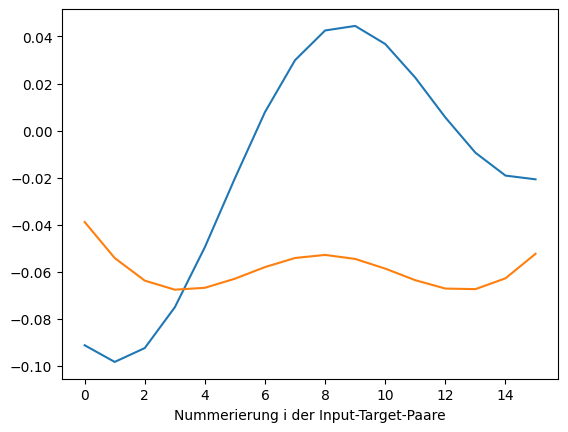

In [6]:
import matplotlib.pyplot as plt

interface_switched = []
with open('training_data/interface_1_0_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_switched)
    
with open('training_data/interface_0_1_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, interface_switched)
    
interface_switched = torch.Tensor(interface_switched)

interface_switched_test = []
with open('training_data/interface_1_0_1_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, interface_switched_test)
    
with open('training_data/interface_0_1_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_switched_test)

interface_switched_test = torch.Tensor(interface_switched_test)

g10_1_training = []
with open('training_data/interface_1_0_1_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, g10_1_training)
    
g10_1_training = torch.Tensor(g10_1_training)

g10_1_test = []
with open('training_data/interface_1_0_1_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, g10_1_test)
    
g10_1_test = torch.Tensor(g10_1_test)


n1 = 0
n2 = target_training.size()[0]
n3 = target_test.size()[0]

x1 = [i for i in range(n2)]
y11 = [target_training.tolist()[i][n1] for i in range(n2)]
y12 = [(net(inp_training) - target_training).tolist()[i][n1] for i in range(n2)]
#y13 = [(interface_switched - target).tolist()[i][n1] for i in range(n2)]
y13 = [(interface_training - target_training).tolist()[i][n1] for i in range(n2)]
y14 = [(g10_1_training - target_training).tolist()[i][n1] for i in range(n2)]

x2 = [i for i in range(n3)]
y21 = [target_test.tolist()[i][n1] for i in range(n3)]
y22 = [(net(inp_test) - target_test).tolist()[i][n1] for i in range(n3)]
#y23 = [(interface_switched_test - target_test).tolist()[i][n1] for i in range(n3)]
y23 = [(interface_test - target_test).tolist()[i][n1] for i in range(n3)]
y24 = [(g10_1_test - target_test).tolist()[i][n1] for i in range(n3)]
#print(x)


#plt.plot(x1, y12)
#plt.plot(x1, y14)
#plt.plot(x1, y11)

plt.plot(x2, y22)
plt.plot(x2, y24)
#plt.plot(x2, y21)

plt.xlabel("Nummerierung i der Input-Target-Paare")

In [18]:
interface = []
solution = []

with open('KirasFM-NN/interface_0_1_1.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface)        
        
with open('KirasFM-NN/solution_0_1.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution)
    
interface = torch.Tensor(interface)
solution = torch.Tensor(solution)
inp = torch.cat((interface, solution), 1)
print(inp.size())

out_list = net(inp).tolist()

with open('KirasFM-NN/interface_1_0_nn.csv', 'w') as interface_1_0_nn:
    writer = csv.writer(interface_1_0_nn, delimiter=';', escapechar=' ', quoting=csv.QUOTE_NONE)
    
    for i in range(len(out_list)):
        row = []
        for j in range(4):
            row += [(out_list[i][2*j],out_list[i][2*j+1]),'(0,0)']
        row += ' '
        writer.writerow(row)

torch.Size([16, 16])
